# Linear Regression

Suppose that we have the following linear hypothesis funtion:
$$
h_\theta(x)=\theta_{0}+\theta_{1}x_{1}+...+\theta_{n}x_{n}$$

Suppose $x_0=1$, we can rewrite the function as:

$$h_\theta(x)=\sum_{i=0}^{n}\theta_ix_i=\theta^Tx$$

with $x=\begin{bmatrix}x_0\\x_1\\...\\x_n\end{bmatrix}$ and $\theta=\begin{bmatrix}\theta_0\\ \theta_1 \\...\\\theta_n\end{bmatrix}$

## Loss function
Suppose that we have m sample $x_j$ with $j={1,2...m}$.

We define the following loss function as a function of $\theta$:

$$L(\theta)=\sum_{j=1}^m(h_\theta(x_j)-y_j)^2$$
We will find $\theta^*$ such that $L(\theta^*)$ is smallest:
$$\theta^*=arg{min}_\theta L(\theta)$$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
data = np.loadtxt("Linear_Regression.txt")

### Split data into training data and testing data

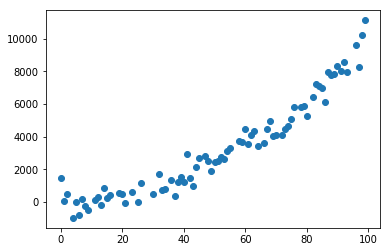

In [4]:
shuffle = np.random.permutation(data.shape[0])

portion = int(0.2 * len(data))

#split into train and validation data
test_x = data[shuffle[:portion], 0].reshape(-1, 1)
test_y = data[shuffle[:portion], 1].reshape(-1, 1)

train_x = data[shuffle[portion:], 0].reshape(-1, 1)
train_y = data[shuffle[portion:], 1].reshape(-1, 1)

# Plot training data
plt.scatter(train_x, train_y)
plt.show()

In [5]:
#pad x with 1 at the beginning
def pad(x):
    return np.hstack((np.ones((x.shape[0], 1), dtype = x.dtype), x))

def predict(theta, x):
    # YOUR CODE HERE
    return pad(x).dot(theta)

def compute_gradient(theta, x, y):
    # Return gradient and loss
    # YOUR CODE HERE
    h = predict(theta, x)
    error = (h - y)
    gradient = (1.0/len(x)) * np.sum(x * error)
    return gradient, np.sum(error**2)/len(x)

### Training

Converged.


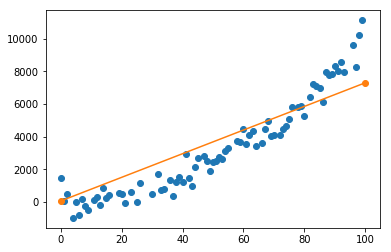

In [6]:
theta = np.random.randn(2).reshape(2,1)

alpha = 0.0005
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
while True:
    # Compute gradient, error and update theta
    # YOUR CODE HERE
    gradient, error = compute_gradient(theta, train_x, train_y)
    new_theta = theta - alpha * gradient
    # ----------------------------------------
    
    # Stopping Condition
    if np.sum(abs(new_theta - theta)) < tolerance:
        print("Converged.")
        break
    
    # Print error every 100 iterations
    if iterations % 100 == 0:
        print("Iteration: %d - Error: %.4f" %(iterations, error))
    
    iterations += 1
    theta = new_theta

line_x = np.array([0, 100]).reshape([2,1])
line_y = predict(theta, line_x)


plt.plot(train_x, train_y, 'o')
plt.plot(line_x, line_y, marker = 'o')

plt.show()

### Validation

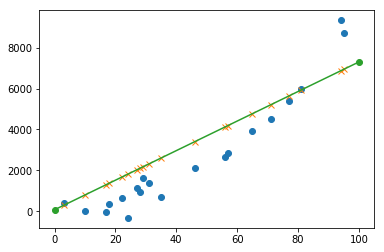

In [7]:
# Predict
# YOUR CODE HERE
test_y_hat = predict(theta, test_x)
# -----------------------------------------

plt.plot(test_x, test_y, 'o')
plt.plot(test_x, test_y_hat, 'x')
plt.plot(line_x, line_y, marker = 'o')
plt.show()